In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# import kagglehub

In [ ]:
# Esimo įvykių statistikos duomenys : https://data.gov.lt/datasets/509/ ;
# Pritaikyti ML jog nustatytumėte, ar tai buvo susidūrimas su gyvūnu?
# Ar galite nustatyti kaltininko lytį, pagal pateiktas eismo įvykio aplinkybes?
# Hipotezė - vyrai daro daugiau vienos rūšies klaidų, moterys - kitos.

In [96]:
df_full = pd.read_json('../../../eismas/ei_2023_12_31_nr2.json')
df_full.head()

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-23-9588945,2023-01-01 00:27,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,None,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ..."
1,07-23-9588946,2023-01-01 00:10,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,None,1,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ..."
2,07-23-9588947,2023-01-01 00:38,2023-01-01 01:39,2023-01-02 14:44,0,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,Kiti susidūrimai,2,0,...,None,1,20.0,Ne,Ne,Ne,6061672.0,582508.0,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...","[{'tpId': 33421658, 'regValstybe': 'Lietuva', ..."
3,07-23-9588948,2023-01-01 00:35,2023-01-01 01:58,2023-01-01 02:17,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,None,1,110.0,Ne,Ne,Ne,6149775.0,540444.0,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...","[{'tpId': 33416857, 'regValstybe': 'Lietuva', ..."
4,07-23-9588949,2022-12-31 23:53,2023-01-01 02:05,2023-02-13 10:50,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2,0,...,None,1,20.0,Ne,Ne,Ne,6069699.0,581077.0,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...","[{'tpId': 33533521, 'regValstybe': 'Lietuva', ..."


In [9]:
df_full.columns

Index(['registrokodas', 'dataLaikas', 'registravimoData',
       'paskutinioRedagavimoLaikas', 'iskaitinis', 'rusis', 'schema1',
       'schema2', 'dalyviuSkaicius', 'zuvusiuSkaicius', 'zuvVaiku',
       'suzeistuSkaicius', 'suzeistaVaiku', 'tpSkaicius',
       'policijosTpSkaicius', 'apgadintuTpSkaicius',
       'apgadintuPolicijosTpSkaicius', 'policijosIstaigaL1',
       'policijosIstaigaL2', 'iforminusiIstaigaL1', 'iforminusiIstaigaL2',
       'ivykioVieta', 'vietosSavivaldybeTipas', 'savivaldybe', 'gatve',
       'namas', 'kitaGatveSankryzoje', 'kelioPavadinimas', 'kelioReiksme',
       'atstumas', 'dangosRusis', 'dangosBukle', 'parosMetas',
       'kelioApsvietimas', 'meteoSalygos', 'kitosOroSalygos',
       'kelioGatvesKreive', 'nuliamentisVeiksnys', 'kitiNuliamentysVeiksniai',
       'atitvarai', 'sankryzosTipas', 'kelioElementas1', 'kelioElementas2',
       'privalomasLeistinasGreitis', 'leistinasGreitis',
       'neblaivusKaltininkai', 'apsvaigeKaltininkai',
       'atsisakeTi

In [102]:
df = df_full[['dataLaikas','rusis', 'schema2','dalyviuSkaicius', 'zuvusiuSkaicius', 'zuvVaiku',
       'suzeistuSkaicius', 'suzeistaVaiku', 'tpSkaicius', 'savivaldybe', 'kelioReiksme',
       'dangosBukle', 'parosMetas', 'kelioApsvietimas', 'meteoSalygos',
       'neblaivusKaltininkai', 'apsvaigeKaltininkai','eismoDalyviai' ]]
df.head()

,dataLaikas,rusis,schema2,dalyviuSkaicius,zuvusiuSkaicius,zuvVaiku,suzeistuSkaicius,suzeistaVaiku,tpSkaicius,savivaldybe,kelioReiksme,dangosBukle,parosMetas,kelioApsvietimas,meteoSalygos,neblaivusKaltininkai,apsvaigeKaltininkai,eismoDalyviai
0,2023-01-01 00:27,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,0,0,0,1,Vilniaus miesto sav.,None,Šlapia,Tamsus paros metas,Įjungtas,Apsiniaukę,Ne,Ne,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',..."
1,2023-01-01 00:10,Susidūrimas,Atsitrenkimas į galą,2,0,0,0,0,2,Klaipėdos rajono sav.,None,Šlapia,Tamsus paros metas,Įjungtas,Lietus,Taip,Ne,"[{'dalyvisId': 48474937, 'kategorija': 'Automo..."
2,2023-01-01 00:38,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,2,0,0,0,0,2,Vilniaus miesto sav.,None,Šlapia,Tamsus paros metas,Įjungtas,Apsiniaukę,Ne,Ne,"[{'dalyvisId': 48480520, 'kategorija': 'Automo..."
3,2023-01-01 00:35,Kiti eismo įvykiai,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,0,0,0,1,Panevėžio rajono sav.,Magistraliniai keliai,Šlapia,Tamsus paros metas,Neįrengtas,Apsiniaukę,Ne,Ne,"[{'dalyvisId': 48474443, 'kategorija': 'Automo..."
4,2022-12-31 23:53,Susidūrimas su stovinčia transporto priemone,Susidūrimas su stovinčia TP,2,0,0,0,0,2,Vilniaus miesto sav.,None,Apledėjusi,Tamsus paros metas,Neįrengtas,Lietus,Ne,Ne,"[{'dalyvisId': 48579303, 'kategorija': 'Automo..."


In [98]:

first_row_info = df['eismoDalyviai'].iloc[0]
print(first_row_info)

[{'dalyvisId': 48690423, 'kategorija': 'Kiti', 'dalyvioTipas': 'Kitas asmuo', 'pasisalino': 'Ne', 'asmuoNezinomas': 'Ne', 'lytis': 'Vyras', 'pilietybe': None, 'amzius': 50, 'neigalumas': 'Ne', 'saugosDirzas': None, 'vaikoKedesNaudojimas': None, 'saugosSalmoNaudojimas': None, 'oroPagalves': None, 'bukle': 'Nenukentėjo', 'detaliBukle': None, 'suzalojimoMastas': None, 'vairuotojoKvalifikacija': None, 'vairavimoStazas': None, 'busena': 'Blaivus', 'detaliBusena': None, 'papBusena': None, 'detaliPapBusena': None, 'kaltininkas': 'Taip', 'girtumasPromilemis': None, 'dalyvioBusena': 'KALTININKAS', 'teisenosStadijaBusena': 'ADMINISTRACINIS', 'dalyvioKetPazeidimai': ['Kiti Kelių eismo taisyklių pažeidimai'], 'tpId': None}, {'dalyvisId': 48690422, 'kategorija': 'Automobilio vairuotojas', 'dalyvioTipas': None, 'pasisalino': 'Taip', 'asmuoNezinomas': 'Taip', 'lytis': None, 'pilietybe': None, 'amzius': None, 'neigalumas': None, 'saugosDirzas': None, 'vaikoKedesNaudojimas': None, 'saugosSalmoNaudojima

In [103]:
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'])

# Extract month number and hour
df['menuo'] = df['dataLaikas'].dt.month
df['valanda'] = df['dataLaikas'].dt.hour



In [106]:
# df['lytis'] = df['eismoDalyviai'].apply(lambda x: x[0].get('lytis') if x is not None else None)
lytis=[]
for i in df['eismoDalyviai']:
    if i is not None:
    # if i[0]['kaltininkas'] == 'Taip':
        try:
            lytis.append(i[0]['lytis'])
        except:
            lytis.append('Nenurodyta')

print(lytis)       
df['lytis'] = lytis

['Vyras', 'Vyras', 'Vyras', None, None, 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Moteris', 'Vyras', 'Vyras', None, 'Vyras', 'Vyras', None, None, None, 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', None, 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', None, None, None, 'Vyras', 'Moteris', 'Vyras', None, 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Vyras', None, 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Moteris', None, 'Moteris', None, None, 'Vyras', 'Vyras', 'Vyras', 'Moteris', None, 'Moteris', None, None, 'Vyras', 'Vyras', None, 'Moteris', 'Moteris', 'Vyras', 'Moteris', None, 'Vyras', 'Vyras', 'Vyras', 'Vyras', None, None, 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Vyras', 'Vyras', None, 'Vyras', 'Moteris', 'Vyras', 'Vyras', 'Vyras', 'Moteris', 'Moteris', 

In [35]:
df.head()

,dataLaikas,rusis,schema2,dalyviuSkaicius,zuvusiuSkaicius,zuvVaiku,suzeistuSkaicius,suzeistaVaiku,tpSkaicius,savivaldybe,...,dangosBukle,parosMetas,kelioApsvietimas,meteoSalygos,neblaivusKaltininkai,apsvaigeKaltininkai,eismoDalyviai,menuo,valanda,lytis
0,2023-01-01 00:27:00,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,0,0,0,1,Vilniaus miesto sav.,...,Šlapia,Tamsus paros metas,Įjungtas,Apsiniaukę,Ne,Ne,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...",1,0,Vyras
1,2023-01-01 00:10:00,Susidūrimas,Atsitrenkimas į galą,2,0,0,0,0,2,Klaipėdos rajono sav.,...,Šlapia,Tamsus paros metas,Įjungtas,Lietus,Taip,Ne,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...",1,0,Vyras
2,2023-01-01 00:38:00,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,2,0,0,0,0,2,Vilniaus miesto sav.,...,Šlapia,Tamsus paros metas,Įjungtas,Apsiniaukę,Ne,Ne,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...",1,0,Vyras
3,2023-01-01 00:35:00,Kiti eismo įvykiai,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,0,0,0,1,Panevėžio rajono sav.,...,Šlapia,Tamsus paros metas,Neįrengtas,Apsiniaukę,Ne,Ne,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...",1,0,None
4,2022-12-31 23:53:00,Susidūrimas su stovinčia transporto priemone,Susidūrimas su stovinčia TP,2,0,0,0,0,2,Vilniaus miesto sav.,...,Apledėjusi,Tamsus paros metas,Neįrengtas,Lietus,Ne,Ne,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...",12,23,None


In [31]:
df['eismoDalyviai'].values[0]

[{'dalyvisId': 48690423,
  'kategorija': 'Kiti',
  'dalyvioTipas': 'Kitas asmuo',
  'pasisalino': 'Ne',
  'asmuoNezinomas': 'Ne',
  'lytis': 'Vyras',
  'pilietybe': None,
  'amzius': 50,
  'neigalumas': 'Ne',
  'saugosDirzas': None,
  'vaikoKedesNaudojimas': None,
  'saugosSalmoNaudojimas': None,
  'oroPagalves': None,
  'bukle': 'Nenukentėjo',
  'detaliBukle': None,
  'suzalojimoMastas': None,
  'vairuotojoKvalifikacija': None,
  'vairavimoStazas': None,
  'busena': 'Blaivus',
  'detaliBusena': None,
  'papBusena': None,
  'detaliPapBusena': None,
  'kaltininkas': 'Taip',
  'girtumasPromilemis': None,
  'dalyvioBusena': 'KALTININKAS',
  'teisenosStadijaBusena': 'ADMINISTRACINIS',
  'dalyvioKetPazeidimai': ['Kiti Kelių eismo taisyklių pažeidimai'],
  'tpId': None},
 {'dalyvisId': 48690422,
  'kategorija': 'Automobilio vairuotojas',
  'dalyvioTipas': None,
  'pasisalino': 'Taip',
  'asmuoNezinomas': 'Taip',
  'lytis': None,
  'pilietybe': None,
  'amzius': None,
  'neigalumas': None,
  

In [143]:
df1 = df[['schema2','dalyviuSkaicius', 'zuvusiuSkaicius', 'zuvVaiku',
       'suzeistuSkaicius', 'suzeistaVaiku', 'tpSkaicius', 'savivaldybe',
       'dangosBukle', 'parosMetas', 'meteoSalygos',
       'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'lytis', 'menuo', 'valanda',
       'kelioReiksme', 'kelioApsvietimas', 'rusis']]
# df1.dropna(subset='lytis', inplace=True)
df1.dropna(inplace=True)
df1.head()

,schema2,dalyviuSkaicius,zuvusiuSkaicius,zuvVaiku,suzeistuSkaicius,suzeistaVaiku,tpSkaicius,savivaldybe,dangosBukle,parosMetas,meteoSalygos,neblaivusKaltininkai,apsvaigeKaltininkai,lytis,menuo,valanda,kelioReiksme,kelioApsvietimas,rusis
5,Kiti eismo įvykiai,1,0,0,0,0,1,Klaipėdos rajono sav.,Šlapia,Tamsus paros metas,Lietus,Ne,Ne,Vyras,1,1,Krašto keliai,Neįrengtas,Užvažiavimas ant gyvūno
8,Visi nuvažiavimai nuo kelio sankryžoje,1,0,0,0,0,1,Mažeikių rajono sav.,Šlapia,Tamsus paros metas,Lietus,Taip,Ne,Vyras,12,23,Krašto keliai,Neįrengtas,Kiti eismo įvykiai
11,Susidūrimas su važiuojančia iš kairės TP,2,0,0,0,0,2,Šilutės rajono sav.,Šlapia,Tamsus paros metas,Lietus,Ne,Ne,Vyras,1,4,Krašto keliai,Neįrengtas,Susidūrimas
27,Užvažiavimas ant gyvūno,1,0,0,0,0,1,Raseinių rajono sav.,Šlapia,Tamsus paros metas,Lietus,Ne,Ne,Vyras,1,16,Rajoniniai keliai,Neįrengtas,Užvažiavimas ant gyvūno
31,Užvažiavimas ant važiuojamoje dalyje esančios ...,1,0,0,0,0,1,Rokiškio rajono sav.,Šlapia,Tamsus paros metas,Lietus,Ne,Ne,Vyras,1,17,Krašto keliai,Neįrengtas,Užvažiavimas ant kliūties


In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 5 to 24236
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   schema2               2235 non-null   object
 1   dalyviuSkaicius       2235 non-null   int64 
 2   zuvusiuSkaicius       2235 non-null   int64 
 3   zuvVaiku              2235 non-null   int64 
 4   suzeistuSkaicius      2235 non-null   int64 
 5   suzeistaVaiku         2235 non-null   int64 
 6   tpSkaicius            2235 non-null   int64 
 7   savivaldybe           2235 non-null   object
 8   dangosBukle           2235 non-null   object
 9   parosMetas            2235 non-null   object
 10  meteoSalygos          2235 non-null   object
 11  neblaivusKaltininkai  2235 non-null   object
 12  apsvaigeKaltininkai   2235 non-null   object
 13  lytis                 2235 non-null   object
 14  menuo                 2235 non-null   int32 
 15  valanda               2235 non-null   int3

In [144]:
categorical_columns = ['schema2','savivaldybe','dangosBukle','parosMetas', 'meteoSalygos',
                       'neblaivusKaltininkai','apsvaigeKaltininkai', 'lytis',
                       'kelioReiksme', 'kelioApsvietimas', 'rusis']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df1[col] = label_encoders[col].fit_transform(df1[col])
    
# cols = ['schema2', 'dalyviuSkaicius', 'zuvusiuSkaicius', 'zuvVaiku',
#        'suzeistuSkaicius', 'suzeistaVaiku', 'tpSkaicius', 'savivaldybe',
#        'dangosBukle', 'parosMetas', 'meteoSalygos', 'neblaivusKaltininkai',
#        'apsvaigeKaltininkai', 'lytis', 'menuo', 'valanda']

# for col in cols:
#     df1[col] = df1[col].apply(lambda x: float(x))
    
# df1.info()
    
X = df1.drop(columns=['schema2', 'rusis'])  # Features
y = df1['schema2']  

X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)
    


Logistic Regression model accuracy (in %): 72.77397260273972


In [123]:
y_test

9272     15
23911    16
17872    15
19703    15
18879     9
         ..
539      15
1007     15
21880    15
3363     15
9748     15
Name: schema2, Length: 447, dtype: int64

<Axes: >

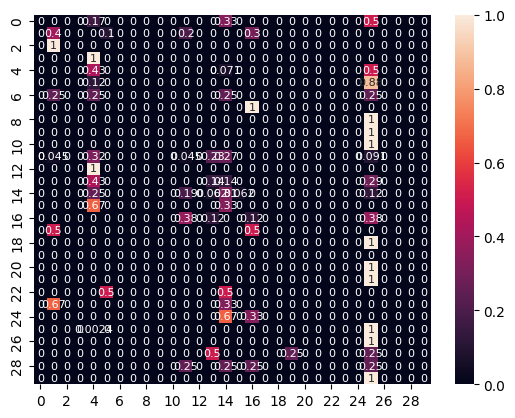

In [140]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':8})

In [146]:
# Ar galite nustatyti kaltininko lytį, pagal pateiktas eismo įvykio aplinkybes?
X = df1.drop(columns=['lytis', 'rusis'])  # Features
y = df1['lytis']  

X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 75.85616438356165


In [126]:
y_test[:5]

9272     1
23911    1
17872    0
19703    1
18879    1
Name: lytis, dtype: int64

<Axes: >

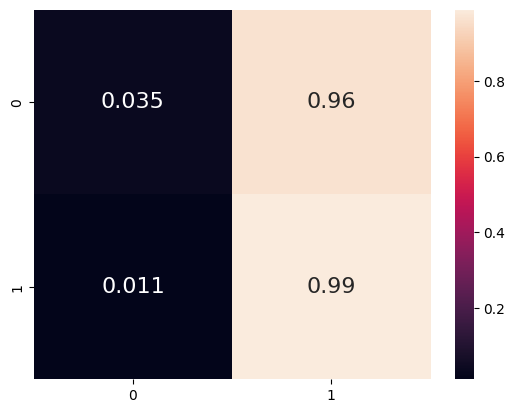

In [147]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

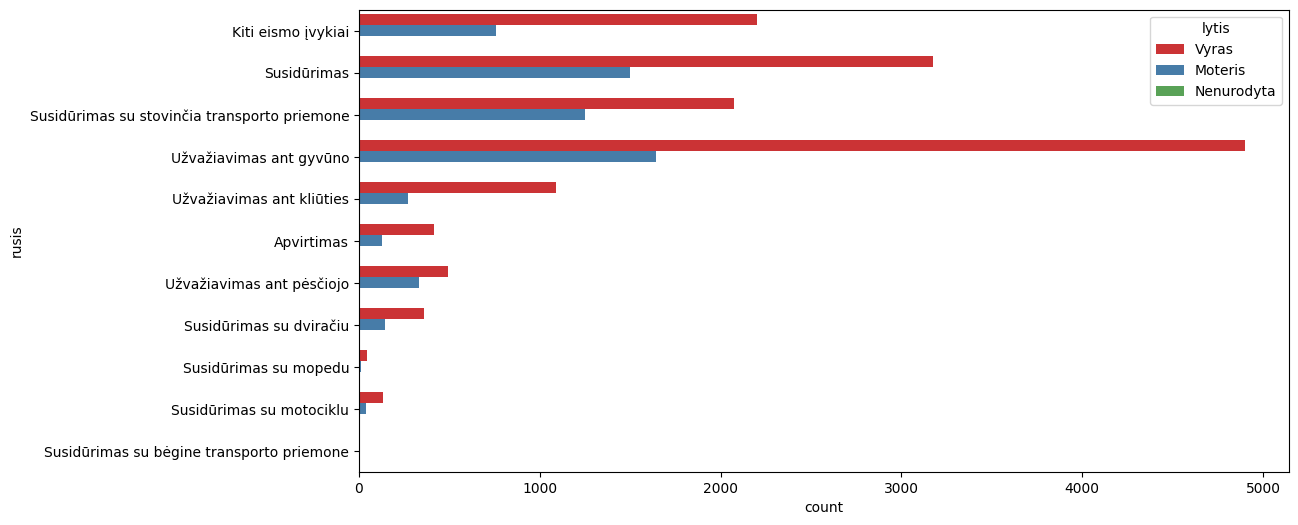

In [148]:
ivykiai = df[['schema2', 'lytis', 'rusis']]
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=ivykiai, y='rusis', hue='lytis', palette='Set1')
plt.show()

# sns.barplot(data=ivykiai_gr, x='schema')